In [2]:
# Load csv from S3 bucket

# Import req'd packages
import pandas as pd
import boto3

# Define S3 bucket and key
bucket = 'velocityspeedproject08'
key = 'datasets/vehicle_speed/vehicle_speed.csv'

# Create a S3 client
s3 = boto3.client('s3')

# Load dataset from S3
obj = s3.get_object(Bucket=bucket, Key=key)
df = pd.read_csv(obj['Body'])

# Preview dataset
df.head()

,latitude,longitude,target_speed,way_maxspeed,speed_osrm,elevation,fwd_azimuth,way_type,way_surface,node:intersection,node:railway,node:crossing,node:highway,node:stop,start_stop,azimuth_diff,elevation_diff
0,50.397062,14.913273,39.739457,130.0,28.837247,229.775169,46.241347,motorway,asphalt,NaN,NaN,NaN,NaN,NaN,0,0.0,-0.025587
1,50.397068,14.913283,39.717786,130.0,28.875627,229.749582,46.241347,motorway,asphalt,NaN,NaN,NaN,NaN,NaN,0,0.0,-0.025587
2,50.397074,14.913294,39.696114,130.0,28.914007,229.723996,46.241347,motorway,asphalt,NaN,NaN,NaN,NaN,NaN,0,0.0,-0.025587
3,50.397080,14.913304,39.674442,130.0,28.952387,229.698409,46.241347,motorway,asphalt,NaN,NaN,NaN,NaN,NaN,0,0.0,-0.025587
4,50.397087,14.913314,39.652771,130.0,28.990767,229.672822,46.241347,motorway,asphalt,NaN,NaN,NaN,NaN,NaN,0,0.0,-0.025587


In [3]:
# Determine shape of df
df.shape

(12165, 17)

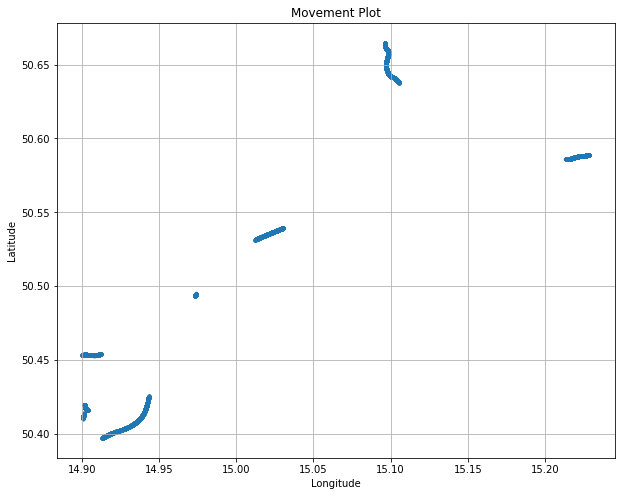

In [4]:
import matplotlib.pyplot as plt

# Plot movement using latitude and longitude
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, marker='.')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Movement Plot')
plt.grid(True)
plt.show()

In [5]:
# Define S3 bucket and key
bucket = 'velocityspeedproject08'
key = 'datasets/vehicle_speed/combined_dataset.csv'

# Create a S3 client
s3 = boto3.client('s3')

# Load dataset from S3
obj = s3.get_object(Bucket=bucket, Key=key)
upd_df = pd.read_csv(obj['Body'])

# Preview dataset
upd_df.head()

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3269: DtypeWarning: Columns (10,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,latitude,longitude,target_speed,way_maxspeed,speed_osrm,elevation,fwd_azimuth,way_type,way_surface,node:intersection,node:railway,node:crossing,node:highway,node:stop,start_stop,azimuth_diff,elevation_diff,IdentifyingValue
0,50.515393,14.966795,18.272307,90.0,18.2,232.000000,116.775715,secondary,asphalt,NaN,NaN,NaN,NaN,NaN,1,0.0,0.000000,98
1,50.515389,14.966808,18.272307,90.0,18.2,232.054728,116.775715,secondary,asphalt,NaN,NaN,NaN,NaN,NaN,0,0.0,0.054728,98
2,50.515385,14.966820,18.272307,90.0,18.2,232.109455,116.775715,secondary,asphalt,NaN,NaN,NaN,NaN,NaN,0,0.0,0.054728,98
3,50.515381,14.966833,18.272307,90.0,18.2,232.164183,116.775715,secondary,asphalt,NaN,NaN,NaN,NaN,NaN,0,0.0,0.054728,98
4,50.515377,14.966845,18.272307,90.0,18.2,232.218911,116.775715,secondary,asphalt,NaN,NaN,NaN,NaN,NaN,0,0.0,0.054728,98


In [6]:
# Determine shape of df
upd_df.shape

(864906, 18)

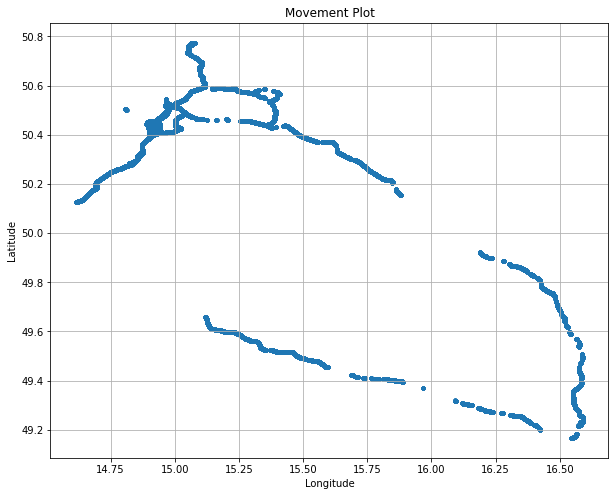

In [7]:
import matplotlib.pyplot as plt

# Plot movement using latitude and longitude
plt.figure(figsize=(10, 8))
plt.scatter(upd_df['longitude'], upd_df['latitude'], alpha=0.5, marker='.')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Movement Plot')
plt.grid(True)
plt.show()

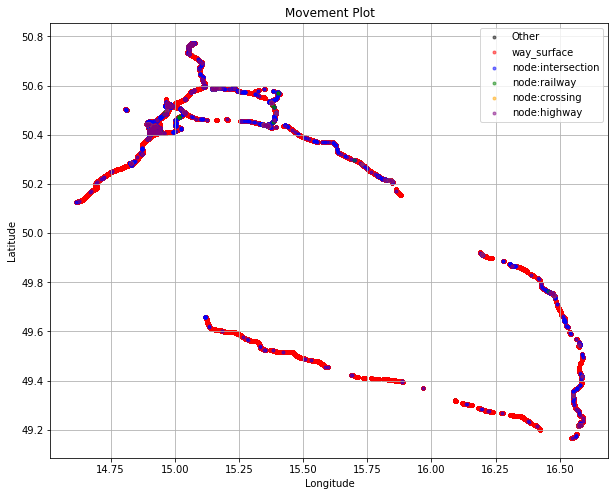

In [8]:
# Define colors for different columns
color_map = {
    'way_surface': 'red',
    'node:intersection': 'blue',
    'node:railway': 'green',
    'node:crossing': 'orange',
    'node:highway': 'purple'
}

# Plot movement using latitude and longitude
plt.figure(figsize=(10, 8))

# Scatter plot for latitude & longitude
plt.scatter(upd_df['longitude'], upd_df['latitude'], alpha=0.5, marker='.', color='black', label='Other')

# Scatter plot for desired columns
for column, color in color_map.items():
    if column in upd_df.columns:
        plt.scatter(upd_df[upd_df[column].notnull()]['longitude'], 
                    upd_df[upd_df[column].notnull()]['latitude'], 
                    alpha=0.5, marker='.', color=color, label=column)

# Add labels & title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Movement Plot')

# Show legend
plt.legend()

plt.grid(True)
plt.show()